In [ ]:
# pip install azure-search-documents==11.3.0

In [ ]:
# pip install flask

In [1]:
import os
from flask import Flask, request, render_template, redirect, url_for

# Import search namespaces
from azure.core.credentials import AzureKeyCredential
from azure.search.documents import SearchClient


app = Flask(__name__)

In [2]:
# Azure Search constants
search_endpoint = 'https://ai102srch231123.search.windows.net'
search_key = 'kZaPwQGTGXqTB25JNRhN8GcxTE18HiJw9gUi4bCNJfAzSeCxhMhu'
search_index = 'margies-custom-index'

In [3]:
# Wrapper function for request to search index
def search_query(search_text, filter_by=None, sort_order=None):
    try:

        # Create a search client
        azure_credential = AzureKeyCredential(search_key)
        search_client = SearchClient(search_endpoint, search_index, azure_credential)
        

        # Submit search query
        results =  search_client.search(search_text,
                                        search_mode="all",
                                        include_total_count=True,
                                        filter=filter_by,
                                        order_by=sort_order,
                                        facets=['metadata_author'],
                                        highlight_fields='merged_content-3,imageCaption-3',
                                        select = "url,metadata_storage_name,metadata_author,metadata_storage_size,metadata_storage_last_modified,language,sentiment,merged_content,keyphrases,locations,imageTags,imageCaption")
        return results
        


    except Exception as ex:
        raise ex

In [4]:
# Home page route
@app.route("/")
def home():
    return render_template("default.html")

# Search results route
@app.route("/search", methods=['GET'])
def search():
    try:

        # Get the search terms from the request form
        search_text = request.args["search"]

        # If a facet is selected, use it in a filter
        filter_expression = None
        if 'facet' in request.args:
            filter_expression = "metadata_author eq '{0}'".format(request.args["facet"])

        # If a sort field is specified, modify the search expression accordingly
        sort_expression = 'search.score()'
        sort_field = 'relevance' #default sort is search.score(), which is relevance
        if 'sort' in request.args:
            sort_field = request.args["sort"]
            if sort_field == 'file_name':
                sort_expression = 'metadata_storage_name asc'
            elif sort_field == 'size':
                sort_expression = 'metadata_storage_size desc'
            elif sort_field == 'date':
                sort_expression = 'metadata_storage_last_modified desc'
            elif sort_field == 'sentiment':
                sort_expression = 'sentiment desc'

        # submit the query and get the results
        results = search_query(search_text, filter_expression, sort_expression)

        # render the results
        return render_template("search.html", search_results=results, search_terms=search_text)

    except Exception as error:
        return render_template("error.html", error_message=error)

In [9]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Nov/2023 15:08:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:08:11] "GET /static/css/site.css HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:08:11] "GET /static/images/margies.jpg HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:08:11] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [24/Nov/2023 15:08:44] "GET /search?search=London+hotel&submit=Search HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:08:44] "GET /static/css/site.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Nov/2023 15:09:37] "GET /search?search=London+hotel&facet=Reviewer&sort=relevance&refine=Refine+Results HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:09:37] "GET /static/css/site.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Nov/2023 15:09:44] "GET /search?search=London+hotel&facet=Reviewer&sort=relevance&refine=Refine+Results HTTP/1.1" 200 -
127.0.0.1 - - [24/Nov/2023 15:09:44] "GET /static/css/site.css HTTP/1.1" 304 -
127.0.0.1 - - [24/Nov/2023 15:09:50

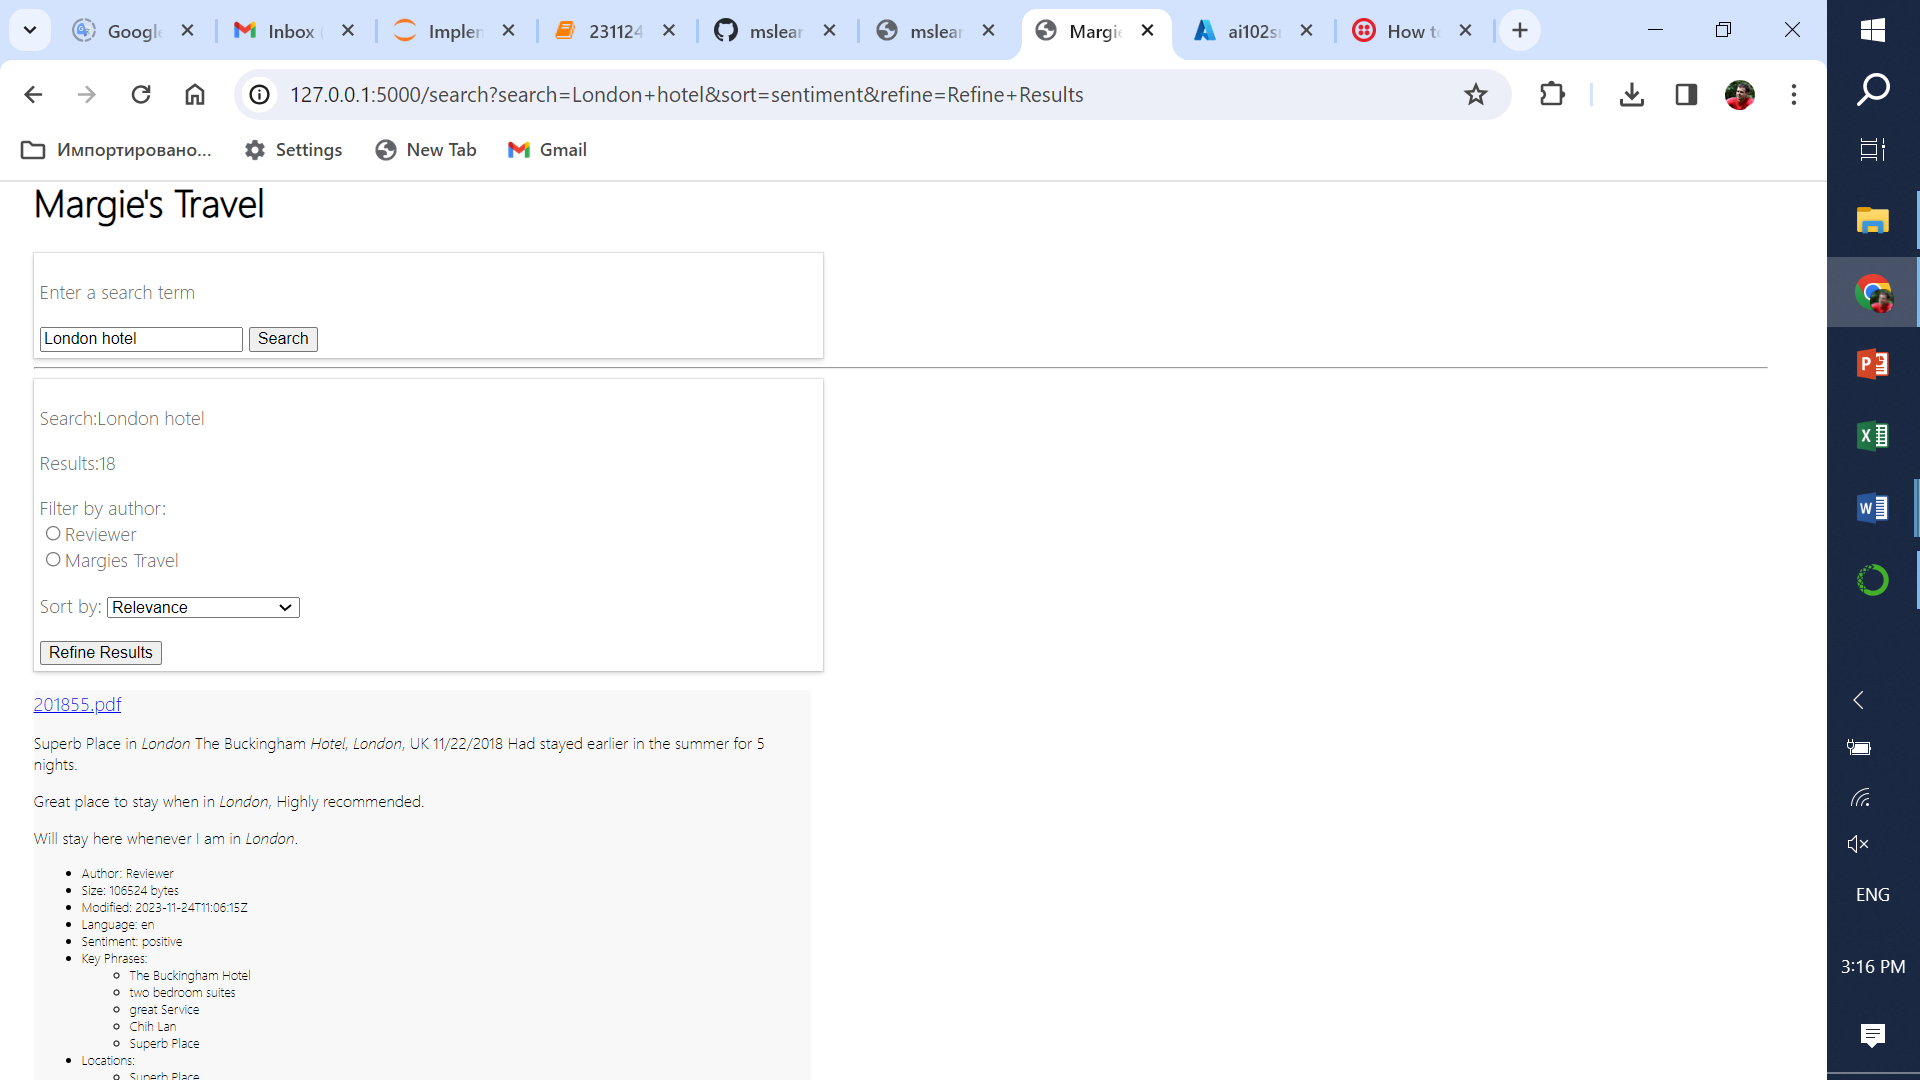